# Panic Project (DHLAB) - Data Analysis

author:  `@cyshin971`  

date:    `2025-07-xx`  

Instructions:
- Run `data_processing.ipynb`
- Output can be found in `./output/{scraped_data_filname}/analysis`

version: `3.0`

> version `1.1`: preprocessing separated to `data_preprocessing.ipynb` (version `1.0`)  
> version `2.0`: Updated to consensus on progress meeting `20250619`  
> version `3.0`: Release Version

In [1]:
version = '3-0'

# 📚 | Import Libraries 

- `python` (`3.10`)
- `pandas`  
- `numpy`
- `json`
- `matplotlib`

In [2]:
import logging

import matplotlib.pyplot as plt
logging.getLogger('matplotlib').setLevel(logging.WARNING)

from library.pandas_utils import move_column, aggregate_by_column, create_empty_df, read_csv
from library.text_utils import save_as_csv
from library.json_utils import save_dict_to_file, load_dict_from_file
from library.path_utils import get_file_path

# ⚙️ | Settings

In [3]:
manual_scraped_data_filename = None # Keep as None if you don't want to manually specify a file

# 📁 | Path Variables 

In [4]:
TMP_PATH = "./_tmp"
OUT_PATH = "./_output"

try:
	features_dict = load_dict_from_file(OUT_PATH, 'panic_features_dict')
except FileNotFoundError:
    raise FileNotFoundError(f"File not found: {get_file_path(OUT_PATH, 'panic_features_dict')}. Please run data_preprocessing.ipynb first.")
print(f"Loaded features dict with {len(features_dict)} keys:")
scraped_data_filename = None
for k, v in features_dict.items():
    if k == 'scraped_data_filename':
        print(f"  {k}: {v}.csv")
        scraped_data_filename = v
    elif k == 'preproc_version':
        preproc_version = v
        print(f"  {k}: {v}")
    else:
        print(f"  {k}: {v}")

if scraped_data_filename is None:
	raise ValueError("scraped_data_filename not found in features_dict")
if manual_scraped_data_filename is not None:
    logging.warning(f"Using manually specified scraped_data_filename: {manual_scraped_data_filename}. If this is not intended, please set it to None.")
    scraped_data_filename = manual_scraped_data_filename

features_dict['analysis_version'] = version
save_dict_to_file(features_dict, OUT_PATH, 'panic_features_dict')

PREPROC_PATH = f"{OUT_PATH}/{scraped_data_filename}/preprocessed"
OUTPUT_PATH = f"{OUT_PATH}/{scraped_data_filename}/analysis"

DEBUG - (json_utils.py) load_dict_from_file: Dictionary loaded successfully from C:\Users\cyshi\OneDrive\Documents\GitHub\Panic-Project-CYS\_output\panic_features_dict.json
DEBUG - (json_utils.py) save_dict_to_file: Dictionary saved successfully to C:\Users\cyshi\OneDrive\Documents\GitHub\Panic-Project-CYS\_output\panic_features_dict.json


Loaded features dict with 18 keys:
  scraped_data_filename: final_result_20250626_360_no_ffill.csv
  preproc_version: 3-0
  demography: ['gender', 'age', 'marriage', 'job', 'smkHx', 'drinkHx', 'suicideHx', 'suicide_need']
  dailylog: ['severity', 'exercise', 'alcohol', 'coffee', 'menstruation', 'smoking', 'positive_feeling', 'negative_feeling', 'positive_E', 'negative_E', 'anxiety', 'annoying']
  mood: ['positive_feeling', 'negative_feeling', 'positive_E', 'negative_E', 'anxiety', 'annoying']
  dailylog_life: ['exercise', 'alcohol', 'coffee', 'menstruation', 'smoking']
  lifelog: ['HR_var', 'HR_max', 'HR_mean', 'HR_hvar_mean', 'HR_acrophase', 'HR_amplitude', 'HR_mesor', 'HR_acrophase_difference', 'HR_acrophase_difference_2d', 'HR_amplitude_difference', 'HR_amplitude_difference_2d', 'HR_mesor_difference', 'HR_mesor_difference_2d', 'bandpower(0.001-0.0005Hz)', 'bandpower(0.0005-0.0001Hz)', 'bandpower(0.0001-0.00005Hz)', 'bandpower(0.00005-0.00001Hz)', 'steps', 'SLT1', 'SLT2', 'SLT3', 'SL

# ⚒️ | Preprocessed Data

## Load Preprocessed Data

In [5]:
pre_data = read_csv(get_file_path(PREPROC_PATH, f'panic_pre_data_{preproc_version}({scraped_data_filename}).csv'))
display(pre_data.head(2))
metadata = read_csv(get_file_path(PREPROC_PATH, f'panic_metadata_{preproc_version}({scraped_data_filename}).csv'))
display(metadata.head(2))
demography_data = read_csv(get_file_path(PREPROC_PATH, f'panic_demography_data_{preproc_version}({scraped_data_filename}).csv'))
display(demography_data.head(2))

,entry_id,dataset,ID,date,PHQ_9,STAI_X2,CSM,CTQ_1,CTQ_2,CTQ_3,...,SLT1,SLT2,SLT3,SLT4,SLT5,SLT6,total_sleep,panic,severity,panic_label
0,PXPN_10006_2024-11-04,PXPN,PXPN_10006,2024-11-04,0.0,32.0,31.0,11.0,13.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
1,PXPN_10006_2024-11-05,PXPN,PXPN_10006,2024-11-05,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.47,3.62,4.67,0.65,1.85,15.26,0.0,NaN,0


,entry_id,ID,date,dataset,dailylog_data,lifelog_data,questionnaire_data,dtype_n,panic,n_prior_data,dbp,valid_entry_3,valid_entry_2,valid_entry_1,ref_event_id,panic_label,severity
0,SYM2-1-96_2021-08-04,SYM2-1-96,2021-08-04,SYM2,0,1,0,1,0.0,2,NaN,0,1,1,NaN,0,NaN
1,SYM2-1-96_2021-08-03,SYM2-1-96,2021-08-03,SYM2,0,1,0,1,0.0,1,NaN,0,0,1,NaN,0,NaN


,ID,gender,age,marriage,job,smkHx,drinkHx,suicideHx,suicide_need
0,PXPN_10006,0,32.0,0.0,1.0,1.0,1.0,0.0,0.0
1,PXPN_10007,1,38.0,1.0,1.0,0.0,0.0,0.0,0.0


# 🔍 | Data Analysis

## 🕳️ | Null Value Analysis

Produces csv file of the percentage of the null values for each feature in Daily Log, and Life Log

In [6]:
null_value_analysis = create_empty_df()
null_value_analysis = pre_data[features_dict['lifelog']+features_dict['dailylog']].isnull().sum().reset_index()
null_value_analysis.rename(columns={0: 'null_count'}, inplace=True)
null_value_analysis.rename(columns={'index': 'feature'}, inplace=True)

# add a column for the data group using the feqtures_dict
null_value_analysis['data_group'] = null_value_analysis['feature'].apply(
    lambda x: 'mood' if x in features_dict['mood'] else
			  'dailylog_life' if x in features_dict['dailylog_life'] else
			  'lifelog_HR' if x in features_dict['lifelog_HR'] else
			  'lifelog_steps' if x in features_dict['lifelog_steps'] else
			  'lifelog_sleep' if x in features_dict['lifelog_sleep'] else
			  'other'
)

# add column for total count
null_value_analysis['total_count'] = len(pre_data)
# find the existing percentage
null_value_analysis['null%'] = (null_value_analysis['null_count'] / null_value_analysis['total_count']) * 100

move_column(null_value_analysis, 'data_group', 1)
move_column(null_value_analysis, 'null%', 2)

save_as_csv(null_value_analysis, OUTPUT_PATH, f"panic_null_value_analysis_{version}({scraped_data_filename})")

display(null_value_analysis.head(5))

DEBUG - (path_utils.py) make_dir: Created directory: C:\Users\cyshi\OneDrive\Documents\GitHub\Panic-Project-CYS\_output\final_result_20250626_360_no_ffill\analysis
DEBUG - (text_utils.py) save_as_csv: Saved panic_null_value_analysis_3-0(final_result_20250626_360_no_ffill).csv to C:\Users\cyshi\OneDrive\Documents\GitHub\Panic-Project-CYS\_output\final_result_20250626_360_no_ffill\analysis


,feature,data_group,null%,null_count,total_count
0,HR_var,lifelog_HR,45.86,8888,19379
1,HR_max,lifelog_HR,45.86,8888,19379
2,HR_mean,lifelog_HR,45.86,8888,19379
3,HR_hvar_mean,lifelog_HR,45.86,8888,19379
4,HR_acrophase,lifelog_HR,51.66,10011,19379


<Figure size 500x1000 with 0 Axes>

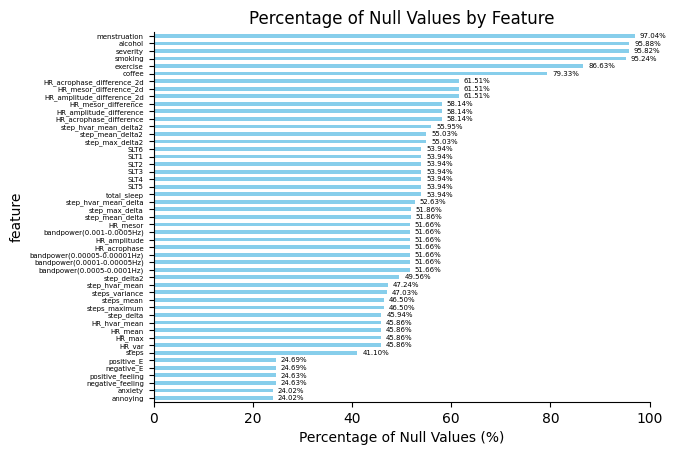

In [7]:
plt.figure(figsize=(5, 10))  # Adjusted to make it thinner horizontally and longer vertically
colors = ['skyblue'] * len(null_value_analysis)
ax = null_value_analysis.sort_values('null%', ascending=True).plot(
	kind='barh', x='feature', y='null%', color=colors, legend=False, width=0.5  # Reduced bar width to increase gaps
)
plt.title("Percentage of Null Values by Feature")
plt.xlabel("Percentage of Null Values (%)")
plt.xlim(0, 100)  # Set the x-axis limit to 0-100
# get rid of the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust y-axis labels for better visibility
ax.set_yticklabels(ax.get_yticklabels(), fontsize=5, rotation=0, ha='right')

# Add labels with values to the right of each bar
for p in ax.patches:
	value = f"{p.get_width():.2f}%"
	ax.annotate(value,
				(p.get_width() + 1, p.get_y() + p.get_height() / 2),
				ha='left', va='center', fontsize=5, color='black', xytext=(0, 0),
				textcoords='offset points')

plt.show()

## 🤯 | Patient-level Analysis

**Description**
- `n_entries`: Number of entries per patient
- `n_valid_3_entries`: Number of valid (3 prior consecutive days of data) entries per patient
- `n_valid_2_entries`: Number of valid (2 prior consecutive days of data) entries per patient
- `n_valid_1_entries`: Number of valid (1 prior consecutive days of data) entries per patient
- `n_panic`: Number of panic events per patient
- `max_severity`: Maximum panic severity experienced by patient
- `min_severity`: Minimum panic severity experienced by patient
- `mean_severity`: Average panic severity experienced by patient
- `n_dailylog`: Number of daily log entries per patient
- `n_lifelog`: Number of life log entries per patient
- `n_questionnaire`: Number of questionnaire entries per patient
- `sum_dtype`: Number of data (by group) per patient
- `mean_dtype`: Average number of data types per entry per patient

In [8]:
agg_matrix = [
	('n_entries', 'entry_id', 'count'),
	('n_valid_3_entries', 'valid_entry_3', 'sum'),
	('n_valid_2_entries', 'valid_entry_2', 'sum'),
	('n_valid_1_entries', 'valid_entry_1', 'sum'),
	('n_panic', 'panic_label', 'sum'),
    ('max_severity', 'severity', 'max'),
	('min_severity', 'severity', 'min'),
	('mean_severity', 'severity', 'mean'),
	('n_dailylog', 'dailylog_data', 'sum'),
	('n_lifelog', 'lifelog_data', 'sum'),
	('n_questionnaire', 'questionnaire_data', 'sum'),
	('sum_dtype', 'dtype_n', 'sum'),
	('mean_dtype', 'dtype_n', 'mean'),
]
patient_analysis_data = create_empty_df()
patient_analysis_data = aggregate_by_column(metadata, 'ID', agg_matrix)

display(patient_analysis_data.head(5))
save_as_csv(patient_analysis_data, OUTPUT_PATH, f"panic_patient_analysis_{version}({scraped_data_filename})")

,ID,n_entries,n_valid_3_entries,n_valid_2_entries,n_valid_1_entries,n_panic,max_severity,min_severity,mean_severity,n_dailylog,n_lifelog,n_questionnaire,sum_dtype,mean_dtype
0,PXPN_10006,28,18,21,24,3,2.0,1.0,1.33,22,28,1,51,1.82
1,PXPN_10007,28,16,20,24,4,2.0,1.0,1.25,20,28,1,49,1.75
2,PXPN_10008,27,18,21,24,3,2.0,1.0,1.67,20,27,1,48,1.78
3,PXPN_10009,28,17,19,22,5,4.0,1.0,2.60,28,28,1,57,2.04
4,PXPN_10010,28,25,26,27,0,NaN,NaN,NaN,23,28,1,52,1.86


DEBUG - (text_utils.py) save_as_csv: Saved panic_patient_analysis_3-0(final_result_20250626_360_no_ffill).csv to C:\Users\cyshi\OneDrive\Documents\GitHub\Panic-Project-CYS\_output\final_result_20250626_360_no_ffill\analysis


WindowsPath('C:/Users/cyshi/OneDrive/Documents/GitHub/Panic-Project-CYS/_output/final_result_20250626_360_no_ffill/analysis/panic_patient_analysis_3-0(final_result_20250626_360_no_ffill).csv')

## 🤯🕳️ | Patient-level Null Value Analysis

Produces csv file of the percentage of the Null values for each feature in Daily Log, and Life Log for each patient

In [9]:
agg_matrix = [('n_entries', 'entry_id', 'count')]
cols_to_analyze = features_dict['lifelog'] + features_dict['dailylog']

for col in cols_to_analyze:
    agg_matrix.append((col, col, 'count'))

patient_null_analysis_data = create_empty_df()
patient_null_analysis_data = aggregate_by_column(pre_data, 'ID', agg_matrix)

for col in cols_to_analyze:
    patient_null_analysis_data[col] = (patient_null_analysis_data['n_entries'] - patient_null_analysis_data[col]) / patient_null_analysis_data['n_entries'] * 100

patient_null_analysis_data['lifelog_avg'] = patient_null_analysis_data[features_dict['lifelog']].mean(axis=1)
patient_null_analysis_data['lifelog_HR_avg'] = patient_null_analysis_data[features_dict['lifelog_HR']].mean(axis=1)
patient_null_analysis_data['lifelog_steps_avg'] = patient_null_analysis_data[features_dict['lifelog_steps']].mean(axis=1)
patient_null_analysis_data['lifelog_sleep_avg'] = patient_null_analysis_data[features_dict['lifelog_sleep']].mean(axis=1)

patient_null_analysis_data['dailylog_avg_avg'] = patient_null_analysis_data[features_dict['dailylog']].mean(axis=1)
patient_null_analysis_data['dailylog_mood_avg'] = patient_null_analysis_data[features_dict['mood']].mean(axis=1)
patient_null_analysis_data['dailylog_life_avg'] = patient_null_analysis_data[features_dict['dailylog_life']].mean(axis=1)

patient_null_analysis_data['total_avg'] = patient_null_analysis_data[features_dict['lifelog'] + features_dict['dailylog']].mean(axis=1)

display(patient_null_analysis_data.head(5))
save_as_csv(patient_null_analysis_data, OUTPUT_PATH, f"panic_patient_null_analysis_{version}({scraped_data_filename})")

,ID,n_entries,HR_var,HR_max,HR_mean,HR_hvar_mean,HR_acrophase,HR_amplitude,HR_mesor,HR_acrophase_difference,...,anxiety,annoying,lifelog_avg,lifelog_HR_avg,lifelog_steps_avg,lifelog_sleep_avg,dailylog_avg_avg,dailylog_mood_avg,dailylog_life_avg,total_avg
0,PXPN_10006,28,10.71,10.71,10.71,10.71,67.86,67.86,67.86,89.29,...,21.43,21.43,36.00,62.61,3.30,32.14,58.93,27.38,90.71,41.62
1,PXPN_10007,28,0.00,0.00,0.00,0.00,53.57,53.57,53.57,82.14,...,28.57,28.57,43.24,50.42,3.30,100.00,64.29,45.24,82.86,48.40
2,PXPN_10008,27,0.00,0.00,0.00,0.00,55.56,55.56,55.56,77.78,...,25.93,25.93,44.14,52.29,3.42,100.00,64.81,37.04,93.33,49.21
3,PXPN_10009,28,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,0.00,0.00,67.57,100.00,7.69,100.00,39.29,0.00,77.86,60.64
4,PXPN_10010,28,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,17.86,17.86,66.51,100.00,4.67,100.00,45.54,20.24,65.00,61.37


DEBUG - (text_utils.py) save_as_csv: Saved panic_patient_null_analysis_3-0(final_result_20250626_360_no_ffill).csv to C:\Users\cyshi\OneDrive\Documents\GitHub\Panic-Project-CYS\_output\final_result_20250626_360_no_ffill\analysis


WindowsPath('C:/Users/cyshi/OneDrive/Documents/GitHub/Panic-Project-CYS/_output/final_result_20250626_360_no_ffill/analysis/panic_patient_null_analysis_3-0(final_result_20250626_360_no_ffill).csv')

# 📒 | Reports

In [10]:
from library.matplotlib_utils import plot_histogram_of_counts

## Overview

In [11]:
unique_ids =  pre_data['ID'].unique()
print(f"Total number of unique IDs in pre_data_filled: {len(unique_ids)}")
print(f"Total number of entries in pre_data_filled: {len(pre_data)}")
panic_entries = pre_data[pre_data['panic_label'] == 1]
print(f"Total number of panic entries in pre_data_filled: {len(panic_entries)}")

Total number of unique IDs in pre_data_filled: 273
Total number of entries in pre_data_filled: 19379
Total number of panic entries in pre_data_filled: 811


In [12]:
filled_entry_ids = pre_data['entry_id'].unique()
print(f"Total number of daily log entries: {metadata[metadata['dailylog_data'] == 1].shape[0]} / {len(filled_entry_ids)} ({metadata[metadata['dailylog_data'] == 1].shape[0] / len(filled_entry_ids) * 100:.2f}%)")
print(f"Total number of life log entries: {metadata[metadata['lifelog_data'] == 1].shape[0]} / {len(filled_entry_ids)} ({metadata[metadata['lifelog_data'] == 1].shape[0] / len(filled_entry_ids) * 100:.2f}%)")
print(f"Total number of questionnaire entries: {metadata[metadata['questionnaire_data'] == 1].shape[0]} / {len(filled_entry_ids)} ({metadata[metadata['questionnaire_data'] == 1].shape[0] / len(filled_entry_ids) * 100:.2f}%)")

Total number of daily log entries: 14854 / 19379 (76.65%)
Total number of life log entries: 12408 / 19379 (64.03%)
Total number of questionnaire entries: 638 / 19379 (3.29%)


In [13]:
panic_patients = metadata[metadata['panic_label'] == 1]['ID'].unique()
print(f"Total number of patients with panic events: {len(panic_patients)}")

Total number of patients with panic events: 105


## 🗒️ | Entry-level Analysis

### Data Groups

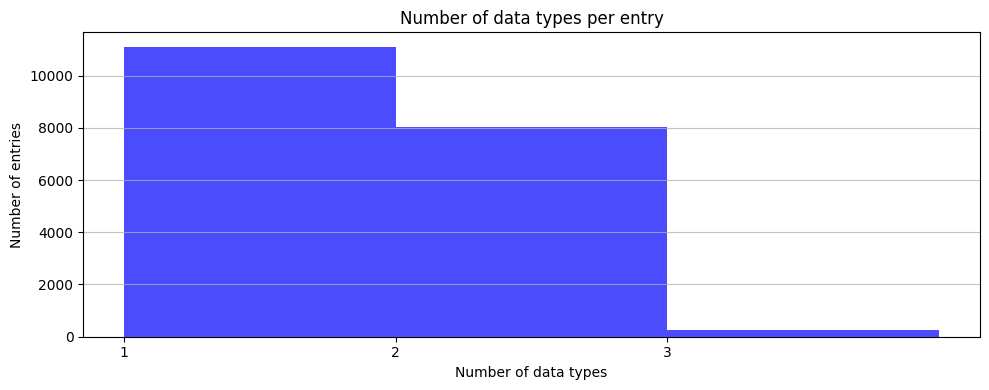

Number of entries with 1 data type: 11099 (57.27%)
Number of entries with 2 data types: 8039 (41.48%)
Number of entries with 3 data types: 241 (1.24%)


In [14]:
plot_histogram_of_counts(metadata['dtype_n'], title='Number of data types per entry', xlabel='Number of data types', ylabel='Number of entries', zero_start=False, bins_step=1)
print(f"Number of entries with 1 data type: {metadata[metadata['dtype_n'] == 1].shape[0]} ({metadata[metadata['dtype_n'] == 1].shape[0] / metadata.shape[0] * 100:.2f}%)")
print(f"Number of entries with 2 data types: {metadata[metadata['dtype_n'] == 2].shape[0]} ({metadata[metadata['dtype_n'] == 2].shape[0] / metadata.shape[0] * 100:.2f}%)")
print(f"Number of entries with 3 data types: {metadata[metadata['dtype_n'] == 3].shape[0]} ({metadata[metadata['dtype_n'] == 3].shape[0] / metadata.shape[0] * 100:.2f}%)")

### Valid Entries

In [15]:
print(f"Total number of valid entries (3 days): {metadata['valid_entry_3'].sum()} ({metadata['valid_entry_3'].mean() * 100:.2f}%)")
print(f"Total number of valid entries (2 days): {metadata['valid_entry_2'].sum()} ({metadata['valid_entry_2'].mean() * 100:.2f}%)")
print(f"Total number of valid entries (1 day): {metadata['valid_entry_1'].sum()} ({metadata['valid_entry_1'].mean() * 100:.2f}%)")

Total number of valid entries (3 days): 14288 (73.73%)
Total number of valid entries (2 days): 15391 (79.42%)
Total number of valid entries (1 day): 16947 (87.45%)


In [16]:
panic_n = pre_data[pre_data['panic_label'] == 1].shape[0]
print(f"Total number of panic events (panic_label=1): {panic_n}")
valid_panic_events_3 = metadata[(metadata['valid_entry_3'] == 1) & (metadata['dbp'] == 0)].shape[0]
print(f"Total number of valid panic events (n_prior_data >= 3 days): {valid_panic_events_3} ({valid_panic_events_3 / panic_n * 100:.2f}%)")
valid_panic_events_2 = metadata[(metadata['valid_entry_2'] == 1) & (metadata['dbp'] == 0)].shape[0]
print(f"Total number of valid panic events (n_prior_data >= 2 days): {valid_panic_events_2} ({valid_panic_events_2 / panic_n * 100:.2f}%)")
valid_panic_events_1 = metadata[(metadata['valid_entry_1'] == 1) & (metadata['dbp'] == 0)].shape[0]
print(f"Total number of valid panic events (n_prior_data >= 1 day): {valid_panic_events_1} ({valid_panic_events_1 / panic_n * 100:.2f}%)")

Total number of panic events (panic_label=1): 811
Total number of valid panic events (n_prior_data >= 3 days): 256 (31.57%)
Total number of valid panic events (n_prior_data >= 2 days): 317 (39.09%)
Total number of valid panic events (n_prior_data >= 1 day): 449 (55.36%)


In [17]:
one_dbp = metadata[metadata['dbp'] == 1]
print(f"Total number of entries with dbp=1: {one_dbp.shape[0]} ({one_dbp.shape[0] / metadata.shape[0] * 100:.2f}%)")
two_dvp = metadata[metadata['dbp'] == 2]
print(f"Total number of entries with dbp=2: {two_dvp.shape[0]} ({two_dvp.shape[0] / metadata.shape[0] * 100:.2f}%)")

Total number of entries with dbp=1: 449 (2.32%)
Total number of entries with dbp=2: 339 (1.75%)


## 🤢 | Patient-level Analysis

In [18]:
pre_data_ids = pre_data['ID'].unique()

### Patient-level Valid Entries

Number of patients with > 100 entries: 60 / 273 (21.98%)
Number of patients with <= 100 entries: 213 / 273 (78.02%)
Number of patients with > 30 entries: 109 / 273 (39.93%)
Number of patients with <= 30 entries: 164 / 273 (60.07%)


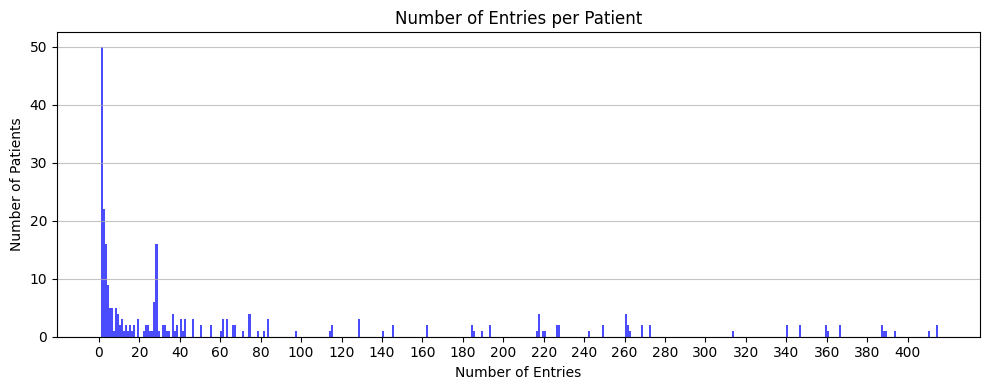

Number of valid patients (1 days): 203 / 273
70 patients do not have valid entries (i.e., no data for at least 1 days before panic event)


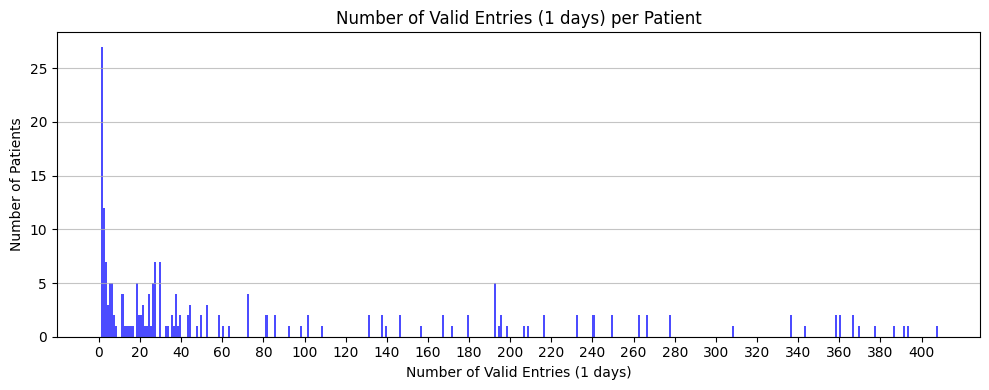

Number of valid patients (2 days): 169 / 273
104 patients do not have valid entries (i.e., no data for at least 2 days before panic event)


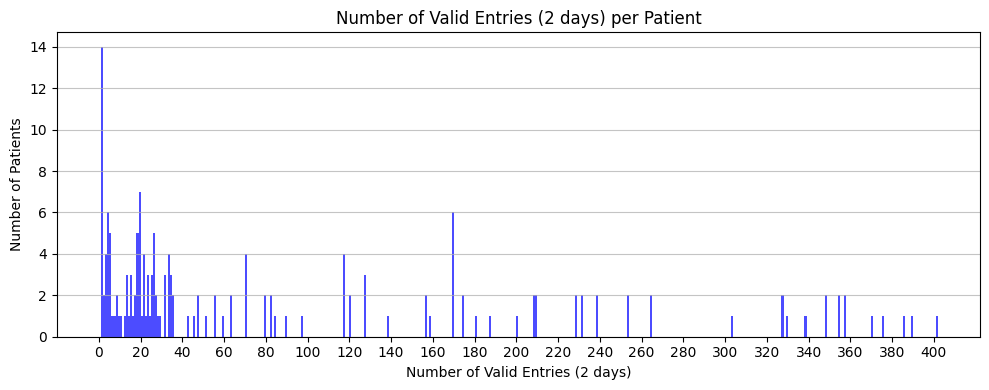

Number of valid patients (3 days): 155 / 273
118 patients do not have valid entries (i.e., no data for at least 3 days before panic event)


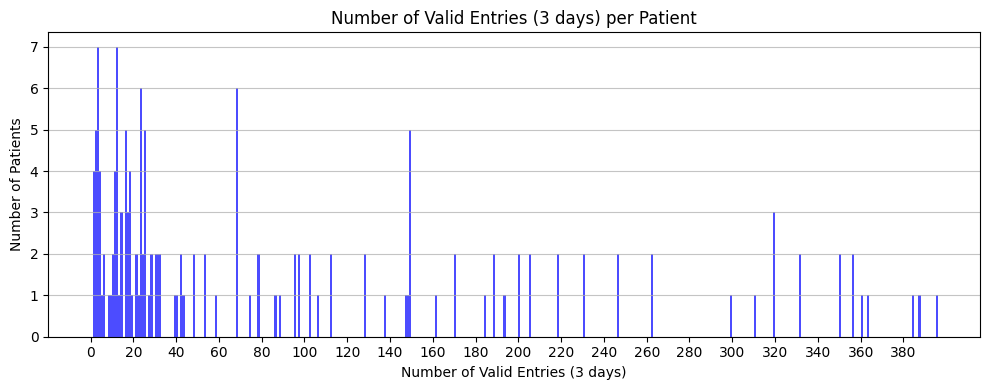

In [19]:
print(f"Number of patients with > 100 entries: {patient_analysis_data[patient_analysis_data['n_entries'] > 100].shape[0]} / {len(pre_data_ids)} ({patient_analysis_data[patient_analysis_data['n_entries'] > 100].shape[0] / len(pre_data_ids) * 100:.2f}%)")
print(f"Number of patients with <= 100 entries: {patient_analysis_data[patient_analysis_data['n_entries'] <= 100].shape[0]} / {len(pre_data_ids)} ({patient_analysis_data[patient_analysis_data['n_entries'] <= 100].shape[0] / len(pre_data_ids) * 100:.2f}%)")
print(f"Number of patients with > 30 entries: {patient_analysis_data[patient_analysis_data['n_entries'] > 30].shape[0]} / {len(pre_data_ids)} ({patient_analysis_data[patient_analysis_data['n_entries'] > 30].shape[0] / len(pre_data_ids) * 100:.2f}%)")
print(f"Number of patients with <= 30 entries: {patient_analysis_data[patient_analysis_data['n_entries'] <= 30].shape[0]} / {len(pre_data_ids)} ({patient_analysis_data[patient_analysis_data['n_entries'] <= 30].shape[0] / len(pre_data_ids) * 100:.2f}%)")
plot_histogram_of_counts(patient_analysis_data['n_entries'], title='Number of Entries per Patient',
                         xlabel='Number of Entries', ylabel='Number of Patients', bins_step=20, exclude_zero=True)
valid_patients = patient_analysis_data[patient_analysis_data['n_valid_1_entries'] > 0]
n_valid_patients_1 = valid_patients.shape[0]
print(f"Number of valid patients (1 days): {valid_patients.shape[0]} / {len(pre_data_ids)}")
print(f"{len(pre_data_ids) - valid_patients.shape[0]} patients do not have valid entries (i.e., no data for at least 1 days before panic event)")
plot_histogram_of_counts(patient_analysis_data['n_valid_1_entries'], title='Number of Valid Entries (1 days) per Patient',
                         xlabel='Number of Valid Entries (1 days)', ylabel='Number of Patients', bins_step=20, exclude_zero=True)
valid_patients = patient_analysis_data[patient_analysis_data['n_valid_2_entries'] > 0]
n_valid_patients_2 = valid_patients.shape[0]
print(f"Number of valid patients (2 days): {valid_patients.shape[0]} / {len(pre_data_ids)}")
print(f"{len(pre_data_ids) - valid_patients.shape[0]} patients do not have valid entries (i.e., no data for at least 2 days before panic event)")
plot_histogram_of_counts(patient_analysis_data['n_valid_2_entries'], title='Number of Valid Entries (2 days) per Patient',
                         xlabel='Number of Valid Entries (2 days)', ylabel='Number of Patients', bins_step=20, exclude_zero=True)
valid_patients = patient_analysis_data[patient_analysis_data['n_valid_3_entries'] > 0]
n_valid_patients_3 = valid_patients.shape[0]
print(f"Number of valid patients (3 days): {valid_patients.shape[0]} / {len(pre_data_ids)}")
print(f"{len(pre_data_ids) - valid_patients.shape[0]} patients do not have valid entries (i.e., no data for at least 3 days before panic event)")
plot_histogram_of_counts(patient_analysis_data['n_valid_3_entries'], title='Number of Valid Entries (3 days) per Patient',
                         xlabel='Number of Valid Entries (3 days)', ylabel='Number of Patients', bins_step=20, exclude_zero=True)
del valid_patients

### Patient-level Panic Analysis

Number of patients with > 2 number of panic events: 62 / 273 (22.71%)
Number of patients with <= 2 number of panic events: 211 / 273 (77.29%)
Number of patients with > 10 number of panic events: 22 / 273 (8.06%)
Number of patients with <= 10 number of panic events: 251 / 273 (91.94%)


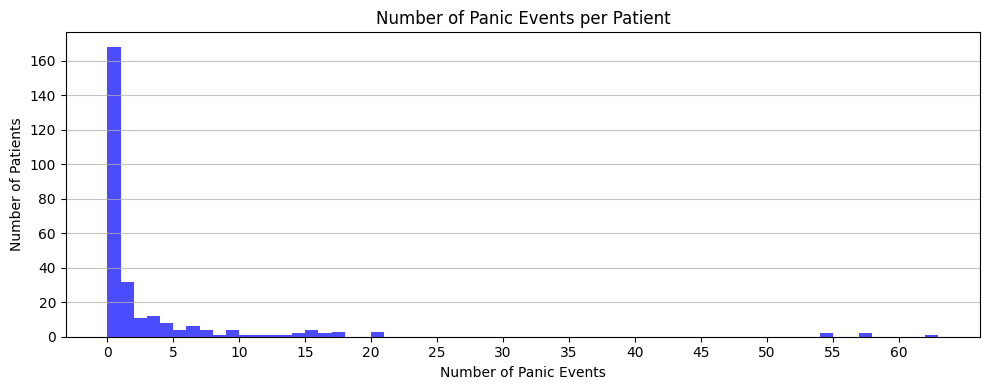

Number of patients with zero panic events: 168 / 273


In [20]:
print(f"Number of patients with > 2 number of panic events: {patient_analysis_data[patient_analysis_data['n_panic'] > 2].shape[0]} / {len(pre_data_ids)} ({patient_analysis_data[patient_analysis_data['n_panic'] > 2].shape[0] / len(pre_data_ids) * 100:.2f}%)")
print(f"Number of patients with <= 2 number of panic events: {patient_analysis_data[patient_analysis_data['n_panic'] <= 2].shape[0]} / {len(pre_data_ids)} ({patient_analysis_data[patient_analysis_data['n_panic'] <= 2].shape[0] / len(pre_data_ids) * 100:.2f}%)")
print(f"Number of patients with > 10 number of panic events: {patient_analysis_data[patient_analysis_data['n_panic'] > 10].shape[0]} / {len(pre_data_ids)} ({patient_analysis_data[patient_analysis_data['n_panic'] > 10].shape[0] / len(pre_data_ids) * 100:.2f}%)")
print(f"Number of patients with <= 10 number of panic events: {patient_analysis_data[patient_analysis_data['n_panic'] <= 10].shape[0]} / {len(pre_data_ids)} ({patient_analysis_data[patient_analysis_data['n_panic'] <= 10].shape[0] / len(pre_data_ids) * 100:.2f}%)")
plot_histogram_of_counts(patient_analysis_data['n_panic'], title='Number of Panic Events per Patient', xlabel='Number of Panic Events', ylabel='Number of Patients', bins_step=5,exclude_zero=False)
print(f"Number of patients with zero panic events: {patient_analysis_data[patient_analysis_data['n_panic'] == 0].shape[0]} / {len(pre_data_ids)}")

In [21]:
valid_panic_events_patients = patient_analysis_data[(patient_analysis_data['n_panic'] > 0) & (patient_analysis_data['n_valid_3_entries'] > 0)]
print(f"Number of patients with valid panic events (3 days): {valid_panic_events_patients.shape[0]} / {n_valid_patients_3}")
valid_panic_events_patients = patient_analysis_data[(patient_analysis_data['n_panic'] > 0) & (patient_analysis_data['n_valid_2_entries'] > 0)]
print(f"Number of patients with valid panic events (2 days): {valid_panic_events_patients.shape[0]} / {n_valid_patients_2}")
valid_panic_events_patients = patient_analysis_data[(patient_analysis_data['n_panic'] > 0) & (patient_analysis_data['n_valid_1_entries'] > 0)]
print(f"Number of patients with valid panic events (1 days): {valid_panic_events_patients.shape[0]} / {n_valid_patients_1}")
del valid_panic_events_patients

Number of patients with valid panic events (3 days): 77 / 155
Number of patients with valid panic events (2 days): 84 / 169
Number of patients with valid panic events (1 days): 93 / 203


In [22]:
patients_with_panic = patient_analysis_data[patient_analysis_data['n_panic'] > 0]
print(f"Number of patients with panic events: {patients_with_panic.shape[0]} / {len(pre_data_ids)}")

Number of patients with panic events: 105 / 273


### Patient-level Data Group Analysis

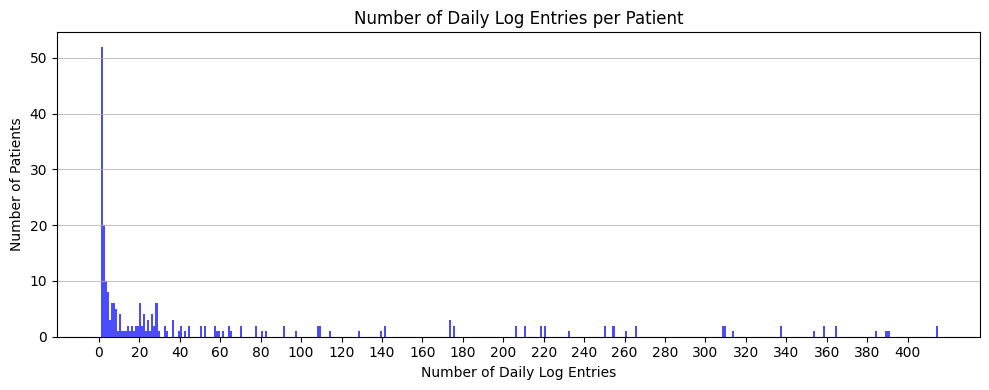

Number of patients with no daily log entries: 35 / 273


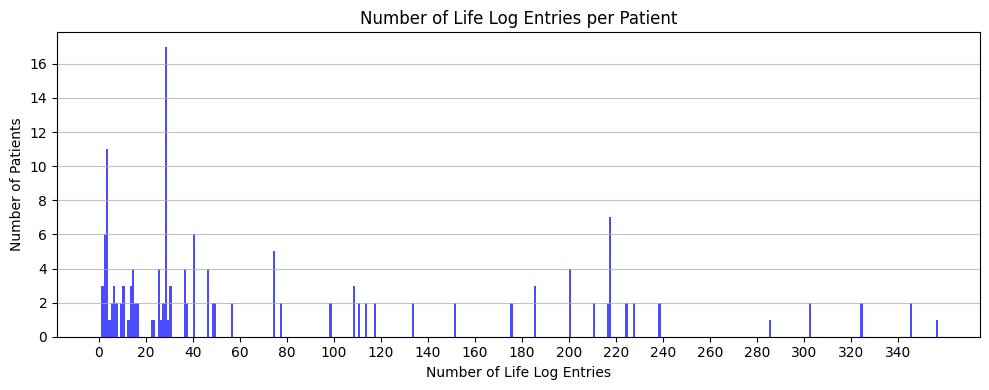

Number of patients with no life log entries: 120 / 273


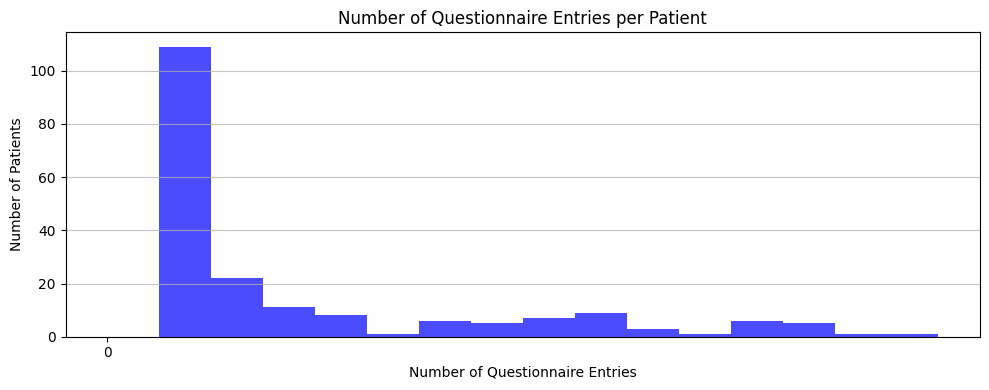

Number of patients with no questionnaire entries: 78 / 273


In [23]:
plot_histogram_of_counts(patient_analysis_data['n_dailylog'], title='Number of Daily Log Entries per Patient',
						 xlabel='Number of Daily Log Entries', ylabel='Number of Patients', bins_step=20, exclude_zero=True)
print(f"Number of patients with no daily log entries: {patient_analysis_data[patient_analysis_data['n_dailylog'] == 0].shape[0]} / {len(pre_data_ids)}")
plot_histogram_of_counts(patient_analysis_data['n_lifelog'], title='Number of Life Log Entries per Patient',
						 xlabel='Number of Life Log Entries', ylabel='Number of Patients', bins_step=20, exclude_zero=True)
print(f"Number of patients with no life log entries: {patient_analysis_data[patient_analysis_data['n_lifelog'] == 0].shape[0]} / {len(pre_data_ids)}")
plot_histogram_of_counts(patient_analysis_data['n_questionnaire'], title='Number of Questionnaire Entries per Patient',
						 xlabel='Number of Questionnaire Entries', ylabel='Number of Patients', bins_step=20, exclude_zero=True)
print(f"Number of patients with no questionnaire entries: {patient_analysis_data[patient_analysis_data['n_questionnaire'] == 0].shape[0]} / {len(pre_data_ids)}")

In [24]:
metadata_panic = metadata[metadata['panic_label'] == 1].copy()
print(f"Number of panic events in preprocessed data: {metadata_panic.shape[0]}")
agg_matrix = [
	('valid_entries_3', 'valid_entry_3', 'sum'),
	('valid_entries_2', 'valid_entry_2', 'sum'),
	('valid_entries_1', 'valid_entry_1', 'sum'),
]
agg_metadata_panic = aggregate_by_column(metadata_panic, 'ID', agg_matrix)

print(f"Number of valid panic entries (valid_entry_3): {agg_metadata_panic['valid_entries_3'].sum()}")
print(f"Number of valid panic entries (valid_entry_2): {agg_metadata_panic['valid_entries_2'].sum()}")
print(f"Number of valid panic entries (valid_entry_1): {agg_metadata_panic['valid_entries_1'].sum()}")
print("--------------------------------------------------------")
print(f"Number of patients with valid panic entries (valid_entry_3): {agg_metadata_panic[agg_metadata_panic['valid_entries_3'] > 0].shape[0]}")
print(f"Number of patients with valid panic entries (valid_entry_2): {agg_metadata_panic[agg_metadata_panic['valid_entries_2'] > 0].shape[0]}")
print(f"Number of patients with valid panic entries (valid_entry_1): {agg_metadata_panic[agg_metadata_panic['valid_entries_1'] > 0].shape[0]}")

Number of panic events in preprocessed data: 811
Number of valid panic entries (valid_entry_3): 256
Number of valid panic entries (valid_entry_2): 317
Number of valid panic entries (valid_entry_1): 449
--------------------------------------------------------
Number of patients with valid panic entries (valid_entry_3): 61
Number of patients with valid panic entries (valid_entry_2): 67
Number of patients with valid panic entries (valid_entry_1): 79
